[*********************100%***********************]  1 of 1 completed
[1250.         1250.         1234.375      ...    2.20000005    2.49000001
    2.42000008]
Date
2001-01-02    1250.000
2001-01-03    1250.000
2001-01-04    1234.375
2001-01-05    1312.500
2001-01-08    1203.125
                ...   
2021-02-22       2.230
2021-02-23       2.100
2021-02-24       2.200
2021-02-25       2.490
2021-02-26       2.420
Name: Close, Length: 5070, dtype: float64
Mean fluctuation is 0.8486215559131741
Median fluctuation is 0.0
Standara Deviation of the fluctuation is 6.878748983217538


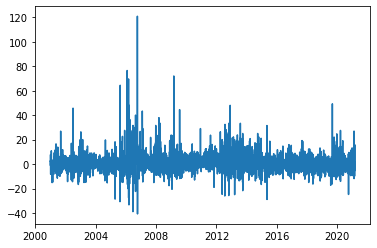

In [4]:
#Welcome to Alpha Vantage! Your API key is: 6NY98HFWJ7HOKS8D. Please record this API key at a safe place for future data access.

# Import yfinance 
import numpy as np
import yfinance as yf   
 
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date 
data = yf.download('ABEO','2001-01-01','2021-02-28') 
 
#data = yf.download(tickers='AAPL', period='1d', interval='1m') #to download 1 day recent data
# Plot the close prices 
import matplotlib.pyplot as plt 

#data.High.plot() 

x=np.array(data.Close)
y=np.array(data.Open)

delta=data.Close-data.Open

d=(np.array(delta)/data.Open)*100
print(x)
plt.show() 

print(data.Close)

fig1=plt.figure()
ax1=fig1.add_subplot(111)

ax1.plot(d)

print("Mean fluctuation is",np.mean(d))
print("Median fluctuation is",np.median(d))
print("Standara Deviation of the fluctuation is",np.std(d))

5070
412.4179334018709


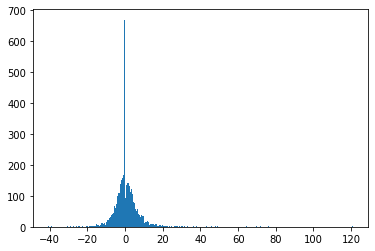

In [5]:
n=len(d)
print(n)
bin=3.49*np.std(d)*(n**(1/3))
print(bin)
counts, bins, bars=plt.hist(d,int(bin))
a=list(zip(counts,bins))

[  0.         -11.42857143  -7.16655893 ...  -0.28823888  -0.28752806
  -0.28815877]


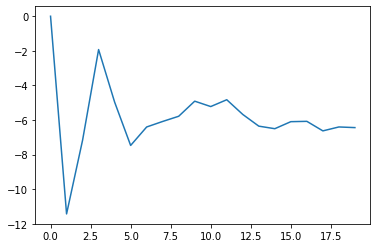

In [52]:
arr=(np.array(d))
moving_d=np.zeros(len(d))
n=1
for i in range(len(d)):
    #a=np.split(arr,{i}[0])
    moving_d[i]=np.sum(arr[0:i])/n
    n+=1
    #moving_d[i]=sum/(i+1)
    #print(f"moving_d{i}={moving_d[i]}")

print(moving_d)

plt.plot(np.arange(0,20,1),moving_d[0:20])

In [10]:
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

#Interval required 1 minute


print(data)

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='Uber live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-02-19 09:30:00-05:00  129.979996  130.050003  129.899994  130.050003   
2021-02-19 09:31:00-05:00  130.039993  130.160004  129.699997  129.809998   
2021-02-19 09:32:00-05:00  129.820007  129.929993  129.669998  129.759903   
2021-02-19 09:33:00-05:00  129.759995  129.970001  129.520004  129.955002   
2021-02-19 09:34:00-05:00  129.960007  129.964996  129.639999  129.774994   
...                               ...         ...         ...         ...   
2021-02-19 15:55:00-05:00  129.804993  129.940002  129.789993  129.839996   
2021-02-19 15:56:00-05:00  129.850006  129.860001  129.740005  129.860001   
2021-02-19 15:57:00-05:00  129.860001  129.960007  129.820007  129.869995   
2021-02-19 15:58:00-05:00  129.869995  129.929993  129.789993  129.880005   
2021-02

In [3]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='6NY98HFWJ7HOKS8D', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
print(type(data))
pprint(data.head(2))

<class 'pandas.core.frame.DataFrame'>
                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-02-26 20:00:00    232.1    232.1   232.0     232.0     1869.0
2021-02-26 19:59:00    232.1    232.1   232.1     232.1     1302.0


In [5]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.5 MB 7.8 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=3f6ffe06d4eb93b9b82494a04acc71aa692d2c24bc45fbf367e68dbbabb752a8
  Stored in directory: /home/jail/dlusers/bbhattarai/.cache/pip/wheels/aa/8a/36/59ed4f6fbcb6100967618eeb0696046bf9777a41ac2ff1f9b9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=02c4af6f78446f7c09f636ce73bf2e894b772cbad9714161642d6425653239d8
  Stored in directory: /home/jail/dlusers/bbhattarai/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
